In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [6]:
labels = pd.read_csv('gender_submission.csv')
test_data = pd.concat([test_data, labels], axis =1)

In [7]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  PassengerId  418 non-null    int64  
 12  Survived     418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

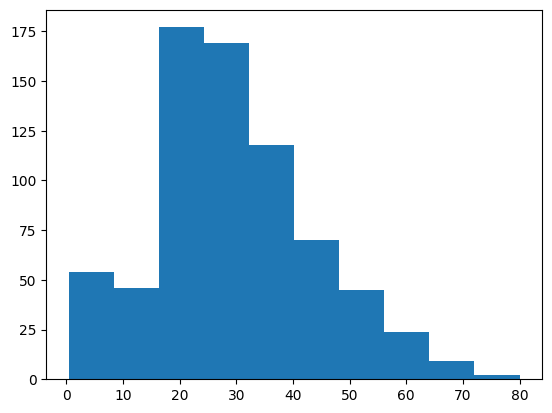

In [10]:
plt.hist(data['Age'])

In [11]:
age_mean = data['Age'].mean()

In [12]:
data['Age'].fillna(age_mean,inplace=True)
test_data['Age'].fillna(age_mean,inplace=True)

C:\Users\21268\AppData\Local\Temp\ipykernel_17564\3769499927.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(age_mean,inplace=True)
C:\Users\21268\AppData\Local\Temp\ipykernel_17564\3769499927.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [57]:
test_data.dropna(inplace= True)

In [13]:
len(data['Cabin'].unique())

148

In [14]:
data['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [15]:
data['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [16]:
data.drop(['Name','Cabin','Ticket'], axis= 1, inplace = True)

In [17]:
test_data.drop(['Name','Cabin','Ticket'], axis= 1, inplace = True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [19]:
data.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [20]:
test_data.dropna()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerId,Survived
0,892,3,male,34.500000,0,0,7.8292,Q,892,0
1,893,3,female,47.000000,1,0,7.0000,S,893,1
2,894,2,male,62.000000,0,0,9.6875,Q,894,0
3,895,3,male,27.000000,0,0,8.6625,S,895,0
4,896,3,female,22.000000,1,1,12.2875,S,896,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,29.699118,0,0,8.0500,S,1305,0
414,1306,1,female,39.000000,0,0,108.9000,C,1306,1
415,1307,3,male,38.500000,0,0,7.2500,S,1307,0
416,1308,3,male,29.699118,0,0,8.0500,S,1308,0


In [21]:
data_enc = pd.get_dummies(data['Embarked'], prefix='Embarked_', dtype=int)

In [22]:
data_enc_test = pd.get_dummies(test_data['Embarked'], prefix='Embarked_', dtype=int)

In [23]:
data_enc

,Embarked__C,Embarked__Q,Embarked__S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [24]:
data =pd.concat([data, data_enc], axis= 1)

In [25]:
test_data =pd.concat([test_data,data_enc_test ], axis= 1)

In [26]:
data.drop(['Embarked'], axis = 1, inplace = True)

In [27]:
test_data.drop(['Embarked'], axis = 1, inplace = True)

In [28]:
data.drop(['PassengerId'], axis = 1, inplace = True)

In [29]:
test_data.drop(['PassengerId'], axis = 1, inplace = True)

In [30]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S
0,0,3,male,22.000000,1,0,7.2500,0,0,1
1,1,1,female,38.000000,1,0,71.2833,1,0,0
2,1,3,female,26.000000,0,0,7.9250,0,0,1
3,1,1,female,35.000000,1,0,53.1000,0,0,1
4,0,3,male,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,0,0,1
887,1,1,female,19.000000,0,0,30.0000,0,0,1
888,0,3,female,29.699118,1,2,23.4500,0,0,1
889,1,1,male,26.000000,0,0,30.0000,1,0,0


In [31]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked__C,Embarked__Q,Embarked__S
0,3,male,34.500000,0,0,7.8292,0,0,1,0
1,3,female,47.000000,1,0,7.0000,1,0,0,1
2,2,male,62.000000,0,0,9.6875,0,0,1,0
3,3,male,27.000000,0,0,8.6625,0,0,0,1
4,3,female,22.000000,1,1,12.2875,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,male,29.699118,0,0,8.0500,0,0,0,1
414,1,female,39.000000,0,0,108.9000,1,1,0,0
415,3,male,38.500000,0,0,7.2500,0,0,0,1
416,3,male,29.699118,0,0,8.0500,0,0,0,1


In [32]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'male' else 0)

In [33]:
test_data['Sex'] = test_data['Sex'].map(lambda x: 1 if x == 'male' else 0)

In [34]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [35]:
data[data['Fare']<1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S
179,0,3,1,36.000000,0,0,0.0,0,0,1
263,0,1,1,40.000000,0,0,0.0,0,0,1
271,1,3,1,25.000000,0,0,0.0,0,0,1
277,0,2,1,29.699118,0,0,0.0,0,0,1
302,0,3,1,19.000000,0,0,0.0,0,0,1
413,0,2,1,29.699118,0,0,0.0,0,0,1
466,0,2,1,29.699118,0,0,0.0,0,0,1
481,0,2,1,29.699118,0,0,0.0,0,0,1
597,0,3,1,49.000000,0,0,0.0,0,0,1
633,0,1,1,29.699118,0,0,0.0,0,0,1


In [36]:
corr_res = data.corr()

<Axes: >

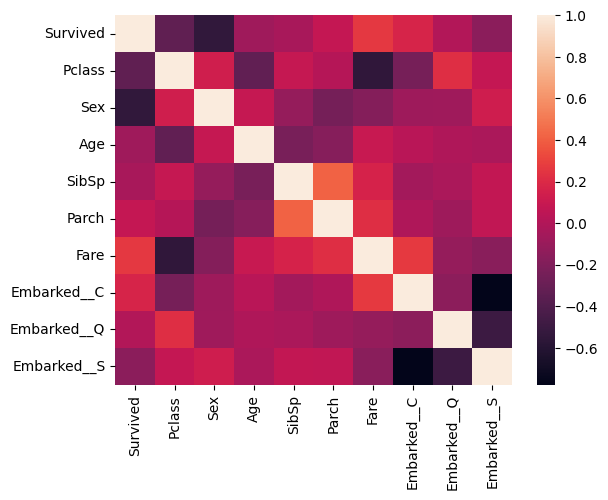

In [37]:
sns.heatmap(corr_res)

In [38]:
pip install lazypredict


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from lazypredict.Supervised import LazyClassifier

In [59]:
X_train = data.drop('Survived', axis=1)
y_train = data['Survived']
X_test = test_data.drop('Survived', axis=1)
y_test = test_data['Survived']

In [64]:
lazy_classifier = LazyClassifier()
results = lazy_classifier.fit(X_train,X_test,y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 20.02it/s]

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


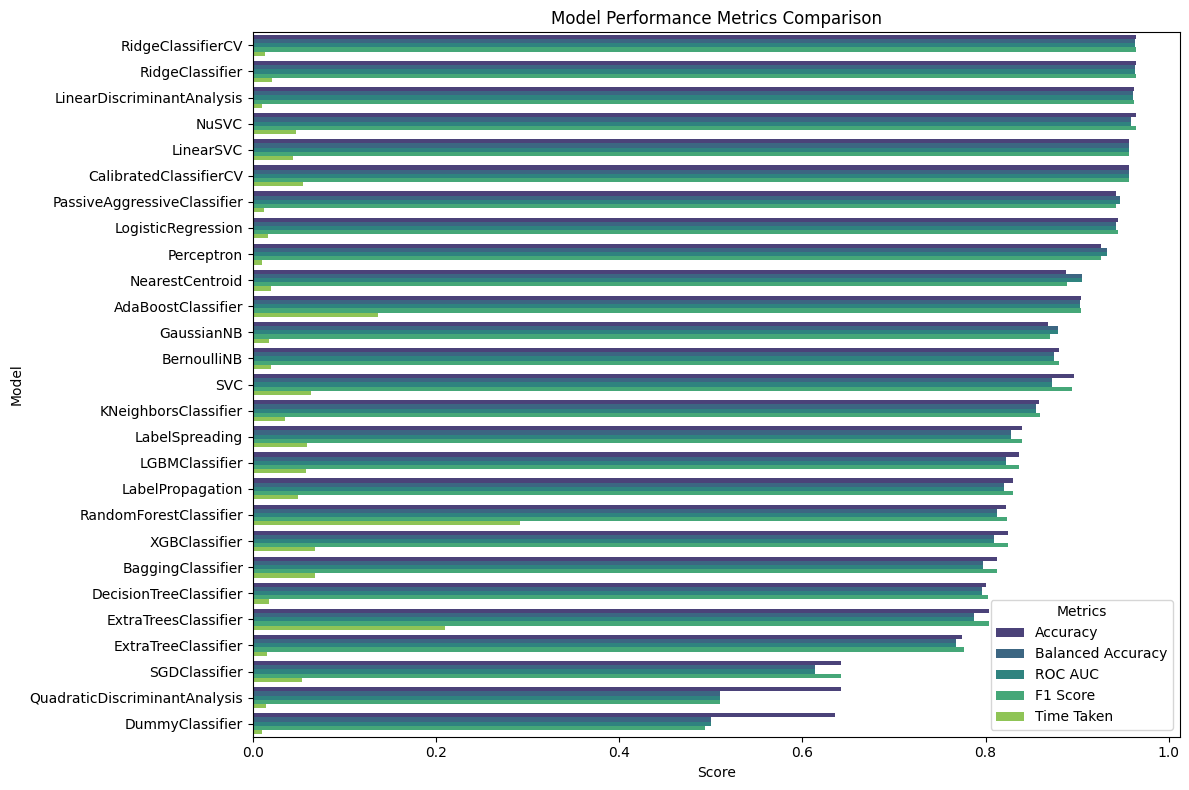

In [65]:
df = pd.DataFrame(results[0])

# Reset the index and melt the DataFrame to long format for easy plotting
df_melted = df.reset_index()
df_melted.columns = ['Model'] + list(df.columns)  # Rename columns to ensure 'Model' is the first
df_melted = df_melted.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="Score", y="Model", hue="Metric", data=df_melted, palette="viridis")

# Add labels and title
plt.xlabel("Score")
plt.ylabel("Model")
plt.title("Model Performance Metrics Comparison")
plt.legend(title="Metrics")
plt.tight_layout()

# Show the plot
plt.show()

In [43]:
from sklearn.linear_model import RidgeClassifierCV

from sklearn.metrics import roc_auc_score, accuracy_score


In [60]:
rid_clf = RidgeClassifierCV()

rid_clf.fit(X_train, y_train)
y_pred = rid_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [61]:
auc = roc_auc_score(y_test, y_pred)


In [62]:
auc

0.9632820258192651

In [63]:
accuracy

0.9640287769784173